## Import libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin'
sys.path.append('/Users/riccardo/Documents/GitHub/COVID19Classification/')
from Modules import Parameters, CustomFunctions as CF

sys.version

'3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 17:50:39) \n[GCC Clang 10.0.0 ]'

## Colors

In [2]:
# Palette 1: colorful
pink = '#E38A8A'
light_green = '#A3F0A3'
green = '#7FB285'
pine_green = '#136F63'
light_pine_green = '#79DDD0'
violet = '#A888BF'
light_red_purp = '#FF616D'
red_purp = '#F73B5C' #'#D83A56'
light_blue = '#3C8DAD'
dark_blue = '#125D98'
queen_blue = '#456990'
orange = '#F5A962'
yellow = '#FFD966'
lavander = '#D5C6E0'
african_violet = '#B084CC'
dark_liver = '#56494C'
dark_purple = '#30011E'
grey_green = '#5B7B7A'
coral = '#ff9f85'
blue_green = '#77CFBF'
eton_blue = '#96c8a2'
grey_1 = '#AAAAAA'
grey_2 = '#DDDDDD'

# color scheme
color_control = CF.lighten_color(green, 0.8)
color_control1 = green
color_immunecells = orange
color_cytokines = pink #red_purp
color_bloodtests1 = lavander
color_bloodtests2 = violet
color_scores = light_red_purp #coral
color_demographics = light_blue #pine_green
color_CT = light_blue
color_0 = dark_blue
color_0_light = light_blue
color_1 = red_purp
color_1_light = light_red_purp
color_background = CF.lighten_color(grey_2, 0.6)
color_IC_multiv = blue_green
color_CK_multiv = coral
color_BM_multiv = queen_blue
color_ICB_multiv = eton_blue

## Parameters

In [3]:
## Multivariate sets
allinput_set = Parameters.allinput_set
immunecells_set = Parameters.immunecells_set
demographics_set = Parameters.demographics_set
cytokines_set = Parameters.cytokines_set 
biomarkers_set = Parameters.biomarkers_set
FC_set = Parameters.FC_set
Dem_set = Parameters.Dem_set
CK_set = Parameters.CK_set
BM_set =  Parameters.BM_set
scores_set = Parameters.scores_set

## Targets
target_train = Parameters.train_target
target_test = Parameters.test_target

## Age
lower_bound = 30 #Parameters.age_min
upper_bound = 100 #Parameters.age_max

## Delta onset
lower_bound_donset = 0 #Parameters.donset_min
upper_bound_donset = 30 #Parameters.donset_max

## Minimum NPV
min_NPV_Models = Parameters.min_NPV_Models
min_NPV = Parameters.min_NPV

## Correlation threshod
corr_th_univ = Parameters.corr_th_univ

## Min % no nans per column
perc_nonans = Parameters.perc_nonans
perc_nonans_univ = Parameters.perc_nonans_univ

## Nan masking row-wise
do_nan_masking = Parameters.do_nan_masking
do_nan_masking_univ = Parameters.do_nan_masking_univ
nan_masking = Parameters.nan_masking
do_nan_masking_groupwise = Parameters.do_nan_masking_groupwise

## Reference time
ref_time = Parameters.ref_time

## N samples for average
N_av = Parameters.N_av

## Imputation
imputation_method = Parameters.imputation_method
imputation_method_univ = Parameters.imputation_method_univ

## Standardization
std_method = Parameters.std_method

## PCA % var. threshold
pc_var_th = Parameters.pca_var_threshold

## Train-test
test_size = Parameters.test_size

## Plot
plot_minNPV_models = Parameters.plot_minNPV_models

## Feature selection
use_manual_selection = Parameters.use_manual_selection

## Paths
path_datasets = Parameters.path_datasets
path_results = Parameters.path_results
path_figures = Parameters.path_figures
exp_description = Parameters.exp_description
exp_univ_description = Parameters.exp_univ_description
exp_multiv_description = Parameters.exp_multiv_description
foldername_univ = Parameters.foldername_univ
foldername_multiv = Parameters.foldername_multiv

## Dataset
use_CCIMasked_dataset = Parameters.use_CCIMasked_dataset

## Regulariser
find_regulariser_before_average = Parameters.find_regulariser_before_average

## Run experiments
run_experiments = True

## Univariate models

In [4]:
# Parameters
fontsize = 9
ylabelsize = 7
xlabelsize = 7 
tex = True
axes_lines_w = 0.5
lines_w = 0.5
capsize = 0
width = 0.7

# variables
len_dem = len(Dem_set)
len_fc = len(FC_set)
len_ck = len(CK_set)
len_bm = len(BM_set)
len_scores = len(scores_set)
len_cytok = len(cytokines_set)
len_immcells = len(immunecells_set)

## All ages, all donset

### Import files

In [5]:
foldername_univ = 'UnivModels_DOnsetMin#0#Max#30_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NanMask#True/'

In [6]:
path_import = path_results+foldername_univ

filename = 'performances_test.xlsx'
df_performances = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)

filename_0 = 'performances_minNPV_test.xlsx'
df_performances_0 = pd.read_excel(path_import+filename_0, engine='openpyxl', header=[0, 1], index_col=0)

In [7]:
# Clean nans
df_performances = df_performances.where(df_performances.notnull().values, 0)
df_performances_0 = df_performances_0.where(df_performances_0.notnull().values, 0)

### Scores

In [8]:
Data = df_performances
Data_0 = df_performances_0
scores = [element[0] for element in Data.columns]
scores = list(dict.fromkeys(scores))
scores_0 = [element[0] for element in Data_0.columns]
scores_0 = list(dict.fromkeys(scores_0))

index = [col.replace('LR: ', '') for col in Data.index]
Data.index = index
index = [col.replace('LR: ', '') for col in Data_0.index]
Data_0.index = index

### Plot

#### AUC

In [9]:
Data_l = Data.copy()
features = allinput_set

# Labels
old_labels = [col for col in Data_l.index]
new_labels = CF.change_names_2(old_labels)
x_labels = np.array(new_labels) # or list(X_data.columns.values)

# Sorting
sorting_score = 'roc_auc_score'
y = Data_l[(sorting_score, 'Mean')].values
idx_sorted = []
for set_col in (Dem_set, immunecells_set, cytokines_set, BM_set, scores_set):
    sub_idx = np.array([i for i in range(len(old_labels)) if old_labels[i] in set_col])
    min_sub_idx = min(sub_idx)
    sub_idx_sorted = min_sub_idx + np.argsort(y[sub_idx])
    idx_sorted.extend(sub_idx_sorted)
idx_sorted = np.array(idx_sorted)
x_labels_sorted = np.array(new_labels)[idx_sorted]
old_labels_sorted =  np.array(old_labels)[idx_sorted]


# Colors
colors = [color_demographics]*len_dem + [color_immunecells]*len_immcells
colors += [color_cytokines]*len_cytok + [color_bloodtests1]*len_bm + [color_scores]*len_scores

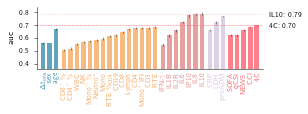

In [10]:
x_range = np.arange(len(features), dtype=float)
dx = 0.2
x_positions_labels = x_range
x_positions_labels[len_dem:] += dx
x_positions_labels[len_dem+len_immcells:] += dx
x_positions_labels[len_dem+len_immcells+len_cytok:] += dx
x_positions_labels[len_dem+len_immcells+len_cytok+len_bm:] += dx
x_positions_bars = x_positions_labels

magnification = 1.5
ratio = 2./5.25

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'roc_auc_score'

y = Data.loc[old_labels_sorted, (score, 'Mean')].values
yerr =  Data.loc[old_labels_sorted, (score, 'Err')].values

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)
ax.bar(x_positions_bars, y, yerr=yerr, color=colors, alpha=0.8, width=width, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('auc')
ax.set_ylim([0.36, .84])
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    
max_score = max(y)
idx1 = len(scores_set)
max_prog_score = max(y[-idx1:])

idx = np.argmax(y)
ax.axhline(y=max_score, ls='--', color=colors[idx], alpha=0.4, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted[idx], max_score)
ax.text(1.025, 1.1*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
idx = len(y)-idx1+np.argmax(y[-idx1:])
ax.axhline(y=max_prog_score, ls='--', color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted[idx], max_prog_score)
ax.text(1.025, 1.*max_prog_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sUniv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

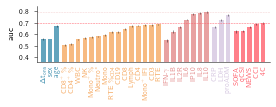

In [11]:
magnification = 1.35
ratio = 2./5.
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'roc_auc_score'

y = Data.loc[old_labels_sorted, (score, 'Mean')].values
yerr =  Data.loc[old_labels_sorted, (score, 'Err')].values

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)
ax.bar(x_positions_bars, y, yerr=yerr, color=colors, alpha=0.8, width=width, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('auc')
ax.set_ylim([0.36, .84])
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    
max_score = max(y)
idx1 = len_scores
max_prog_score = max(y[-idx1:])

idx = np.argmax(y)
ax.axhline(y=max_score, ls='--', color=colors[idx], alpha=0.4, lw=0.5)
idx = len(y)-idx1+np.argmax(y[-idx1:])
ax.axhline(y=max_prog_score, ls='--', color=colors[idx], alpha=1, lw=0.5)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sUniv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

#### minNPV - NPV

In [12]:
Data_l = Data_0.loc[features, :].copy()

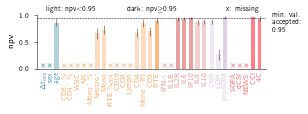

In [13]:
magnification = 1.5
ratio = 2./5.25

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

score = 'NPV'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_l.loc[old_labels_sorted, (score, 'Mean')].values
yerr =  Data_l.loc[old_labels_sorted, (score, 'Err')].values

#ax.bar(x_positions_bars, y, color=colors, ecolor=colors, alpha=.3, width=0.6)
#ax.bar(x_positions_bars, y, yerr=yerr, capsize=capsize, color=colors, edgecolor=colors, facecolor='none', ecolor=colors, alpha=1., width=0.6, lw=0.6, error_kw=dict(lw=0.6))
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

mask_npv_high = y+yerr>0.95
x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_low = mask_npv_high==False
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.4
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#ax.bar(x_pos_l, y_l, yerr=yerr_l, capsize=capsize, color=colors_l, edgecolor=colors_l, facecolor='none', ecolor=colors_l, alpha=0.65, width=0.6, lw=0.5, error_kw=dict(lw=0.6))
#
mask_npv_none = (y>0.)==False
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.06*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)
#ax.bar(x_pos_l, y_l, yerr=yerr_l, capsize=capsize, color=colors_l, edgecolor=colors_l, facecolor='none', ecolor=colors_l, alpha=0.65, width=0.6, lw=0.5, error_kw=dict(lw=0.6))

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel(name_score)
#ax.set_ylim([0.4, .9])
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, .9])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    

minNPV_train = min_NPV
ax.axhline(y=minNPV_train-0.02, ls='--', color='black', alpha=1, lw=0.5)
my_string = 'min. val.\naccepted:\n%.2f' % (minNPV_train-0.02)
ax.text(1.025, 1.1*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'light: npv$<$%.2f' % (minNPV_train-0.02)
ax.text(0.04, 1.1, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'dark: npv$\ge$%.2f' % (minNPV_train-0.02)
ax.text(0.5, 1.1, my_string,
           horizontalalignment='center',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'x: missing'
ax.text(.96, 1.1, my_string,
           horizontalalignment='right',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

#ax.set_yscale('log')
ax.set_ylim([0., 1.])
ax.set_yticks([0., 0.5, 1.])
filename = 'minNPV#%sUniv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 
plt.show()

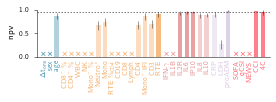

In [14]:
magnification = 1.35
ratio = 2./5.

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(magnification=magnification, ratio=ratio*0.95, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

score = 'NPV'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_0.loc[old_labels_sorted, (score, 'Mean')].values
yerr =  Data_0.loc[old_labels_sorted, (score, 'Err')].values

#ax.bar(x_positions_bars, y, color=colors, ecolor=colors, alpha=.3, width=0.6)
#ax.bar(x_positions_bars, y, yerr=yerr, capsize=capsize, color=colors, edgecolor=colors, facecolor='none', ecolor=colors, alpha=1., width=0.6, lw=0.6, error_kw=dict(lw=0.6))
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

mask_npv_high = y+yerr>0.95
x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_low = mask_npv_high==False
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.4
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#ax.bar(x_pos_l, y_l, yerr=yerr_l, capsize=capsize, color=colors_l, edgecolor=colors_l, facecolor='none', ecolor=colors_l, alpha=0.65, width=0.6, lw=0.5, error_kw=dict(lw=0.6))
#
mask_npv_none = (y>0.)==False
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.06*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)
#ax.bar(x_pos_l, y_l, yerr=yerr_l, capsize=capsize, color=colors_l, edgecolor=colors_l, facecolor='none', ecolor=colors_l, alpha=0.65, width=0.6, lw=0.5, error_kw=dict(lw=0.6))

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel(name_score)
ax.set_ylim([0., 1.])
ax.set_yticks([0., 0.5, 1.])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    

minNPV_train = min_NPV
ax.axhline(y=minNPV_train-0.02, ls='--', dashes=(3., 3.), color='black', alpha=1., lw=0.5)


filename = 'minNPV#%sUniv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 
plt.show()

#### minNPV - specificity

In [15]:
Data_l = Data_0.loc[features, :].copy()

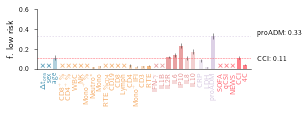

In [24]:
magnification = 1.5
ratio = 2./5.25

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'specificity'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_l.loc[old_labels_sorted, (score, 'Mean')].values
yerr =  Data_l.loc[old_labels_sorted, (score, 'Err')].values

for i, element in enumerate(y):
    if element-yerr[i]<0:
        #pass
        #y[i] = 0.01
        yerr[i] = element/2.

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.4
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.03*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('f. low risk')
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    

y_l = y
y_l[mask_npv_low] = 0
y_l[mask_npv_none] = 0
max_score = max(y_l)
idx1 = len_scores
max_prog_score = max(y_l[-idx1:])

idx = np.argmax(y_l)
ax.axhline(y=max_score, ls='--', dashes=(3., 3.), color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted[idx], max_score)
ax.text(1.025, 1.8*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
idx = len(y_l)-idx1+np.argmax(y_l[-idx1:])
ax.axhline(y=max_prog_score, ls='--', color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted[idx], max_prog_score)
ax.text(1.025, 1.4*max_prog_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

ax.set_ylim([0., .6])
ax.set_yticks([0., 0.2, .4, 0.6])
filename = 'minNPV#%sUniv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 
plt.show()

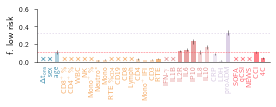

In [26]:
magnification = 1.35
ratio = 2./5.

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'specificity'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_l.loc[old_labels_sorted, (score, 'Mean')].values 
yerr =  Data_l.loc[old_labels_sorted, (score, 'Err')].values 

for i, element in enumerate(y):
    if element-yerr[i]<0:
        yerr[i] = element/2.

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.4
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.03*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('f. low risk')
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    

y_l = y
y_l[mask_npv_low] = 0
y_l[mask_npv_none] = 0
max_score = max(y_l)
idx1 = len_scores
max_prog_score = max(y_l[-idx1:])

idx = np.argmax(y_l)
ax.axhline(y=max_score, ls='--', dashes=(3., 3.), color=colors[idx], alpha=1, lw=0.5)
idx = len(y_l)-idx1+np.argmax(y_l[-idx1:])
ax.axhline(y=max_prog_score, ls='--', color=colors[idx], alpha=1, lw=0.5)

ax.set_ylim([0., 0.6])
ax.set_yticks([0., 0.2, .4, 0.6])
filename = 'minNPV#%sUniv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 
plt.show()

# Multivariate models

In [27]:
foldername_univ = 'UnivModels_DOnsetMin#0#Max#30_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NanMask#True/'

In [28]:
path_import = path_results+foldername_univ

filename = 'performances_test.xlsx'
df_performances_univ = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)

filename_0 = 'performances_minNPV_test.xlsx'
df_performances_univ_0 = pd.read_excel(path_import+filename_0, engine='openpyxl', header=[0, 1], index_col=0)

In [29]:
# Clean nans
df_performances_univ = df_performances_univ.where(df_performances_univ.notnull().values, 0)
df_performances_univ_0 = df_performances_univ_0.where(df_performances_univ_0.notnull().values, 0)

In [30]:
foldername_multiv = 'MultivModels_DOnsetMin#0#Max#30_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'

In [31]:
path_import = path_results+foldername_multiv

filename = 'performances_test.xlsx'
df_performances = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)

filename_0 = 'performances_minNPV_test.xlsx'
df_performances_0 = pd.read_excel(path_import+filename_0, engine='openpyxl', header=[0, 1], index_col=0)

In [32]:
# Clean nans
df_performances = df_performances.where(df_performances.notnull().values, 0)
df_performances_0 = df_performances_0.where(df_performances_0.notnull().values, 0)

In [33]:
Data_univ = df_performances_univ
Data_univ_0 = df_performances_univ_0
Data = df_performances
Data_0 = df_performances_0
scores = [element[0] for element in Data.columns]
scores = list(dict.fromkeys(scores))
scores_0 = [element[0] for element in Data_0.columns]
scores_0 = list(dict.fromkeys(scores_0))

index = [col.replace('LR: ', '') for col in Data_univ.index]
Data_univ.index = index
index = [col.replace('LR: ', '') for col in Data_univ_0.index]
Data_univ_0.index = index
index = [col.replace('LR: ', '') for col in Data.index]
Data.index = index
index = [col.replace('LR: ', '') for col in Data_0.index]
Data_0.index = index

In [34]:
features = Dem_set + FC_set + CK_set + BM_set + scores_set
Data_l = Data_univ.loc[features, :].copy()

# Labels
old_labels = [col for col in Data_l.index]
new_labels = CF.change_names_2(old_labels)
x_labels = np.array(new_labels) # or list(X_data.columns.values)

# Sorting
sorting_score = 'roc_auc_score'
y = Data_l[(sorting_score, 'Mean')].values
idx_sorted = []
for set_col in (Dem_set, FC_set, CK_set, BM_set, scores_set):
    sub_idx = np.array([i for i in range(len(old_labels)) if old_labels[i] in set_col])
    min_sub_idx = min(sub_idx)
    sub_idx_sorted = min_sub_idx + np.argsort(y[sub_idx])
    idx_sorted.extend(sub_idx_sorted)
idx_sorted = np.array(idx_sorted)
x_labels_sorted = np.array(new_labels)[idx_sorted]
old_labels_sorted =  np.array(old_labels)[idx_sorted]



# Colors
colors = [color_demographics]*len_dem
colors += [color_immunecells]*len_fc
colors += [color_cytokines]*len_ck
colors += [color_bloodtests1]*len_bm
colors += [color_scores]*len_scores

multiv_models = ['FC',
                 'FC+Dem',
                 'CK', 
                 'CK+Dem',
                 'BM', 
                 'BM+Dem']

Data_combo = pd.concat([Data_univ.loc[old_labels_sorted, :], Data.loc[multiv_models, :]], axis=0)

colors += [color_IC_multiv]*2 # FC models
colors += [color_CK_multiv]*2 # CK models
colors += [color_BM_multiv]*2 # BM models
v = [element.replace('LR: ', '').replace('+', ',').replace('.', '') for element in multiv_models]
multiv_models_names = v
old_labels_sorted_combo = list(old_labels_sorted) + multiv_models
x_labels_sorted_combo = list(x_labels_sorted) + v 

### Plot

#### AUC

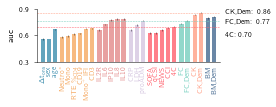

In [35]:
x_range = np.arange(len(x_labels_sorted_combo), dtype=float)
dx = 0.2
x_positions_labels = x_range
x_positions_labels[len_dem:] += dx
x_positions_labels[len_dem+len_fc:] += dx
x_positions_labels[len_dem+len_fc+len_ck:] += dx
x_positions_labels[len_dem+len_fc+len_ck+len_dem:] += dx
x_positions_labels[len_dem+len_fc+len_ck+len_dem+len_scores:] += dx
x_positions_labels[len_dem+len_fc+len_ck+len_dem+len_scores+2:] += dx
x_positions_labels[len_dem+len_fc+len_ck+len_dem+len_scores+4:] += dx
x_positions_bars = x_positions_labels

magnification = 1.35
ratio = 2./5.

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

score = 'roc_auc_score'

Data_to_use = Data_combo

y = Data_to_use.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_to_use.loc[old_labels_sorted_combo, (score, 'Err')].values
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)
ax.bar(x_positions_bars, y, yerr=yerr, color=colors, alpha=0.8, width=width, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('auc')
ax.set_ylim([0.3, .9])
ax.set_yticks([0.3, 0.6, 0.9])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    
max_score = max(y)
idx1 = len_dem + len_fc + len_ck + len_bm
idx2 = idx1 + len_scores
idx3 = idx2 + 1
max_score_progscores = max(y[idx1:idx2])
IC_Dem = y[idx3]

idx = np.argmax(y)
ax.axhline(y=max_score, ls='--', color=colors[idx], lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx], max_score)
ax.text(1.025, 1.1*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
ax.axhline(y=IC_Dem, ls='--', color=colors[idx3], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx3], IC_Dem)
ax.text(1.025, 1.0*IC_Dem, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
idx = np.argmax(y[idx1:idx2])+idx1
ax.axhline(y=max_score_progscores, ls='--', color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx], max_score_progscores)
ax.text(1.025, 0.725*max_score_progscores, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sMultiv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 

#plt.bar(x_positions_bars, perf)
plt.show()

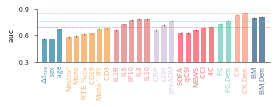

In [36]:
magnification = 1.35
ratio = 2./5.

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'roc_auc_score'

Data_to_use = Data_combo

y = Data_to_use.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_to_use.loc[old_labels_sorted_combo, (score, 'Err')].values

#ax.bar(x_positions_bars, y, color=colors, ecolor=colors, alpha=.3, width=0.6)
#ax.bar(x_positions_bars, y, yerr=yerr, capsize=capsize, color=colors, edgecolor=colors, facecolor='none', ecolor=colors, alpha=1., width=0.6, lw=0.6, error_kw=dict(lw=0.6))
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)
ax.bar(x_positions_bars, y, yerr=yerr, color=colors, alpha=0.8, width=width, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('auc')
ax.set_ylim([0.3, .9])
ax.set_yticks([0.3, 0.6, 0.9])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    

idx = np.argmax(y)
ax.axhline(y=max_score, ls='--', color=colors[idx], lw=0.5)
ax.axhline(y=IC_Dem, ls='--', color=colors[idx3], alpha=1, lw=0.5)
idx = np.argmax(y[idx1:idx2])+idx1
ax.axhline(y=max_score_progscores, ls='--', color=colors[idx], alpha=1, lw=0.5)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sMultiv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight')
plt.show()

#### minNPV - NPV

In [37]:
Data_combo_0 = pd.concat([Data_univ_0.loc[old_labels_sorted, :], Data_0.loc[multiv_models, :]], axis=0)

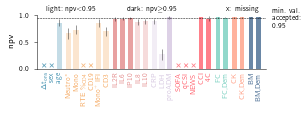

In [38]:
magnification = 1.5
ratio = 2./5.25

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'NPV'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_combo_0.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_combo_0.loc[old_labels_sorted_combo, (score, 'Err')].values
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

mask_npv_high = y>0.9
mask_npv_high = mask_npv_high & (y+yerr>0.95)
x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_low = mask_npv_high==False
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.3
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_none = (y>0.)==False
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.06*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel(name_score)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    

minNPV_train = min_NPV
ax.axhline(y=minNPV_train-0.02, ls='--', color='black', alpha=1, lw=0.5)
my_string = 'min. val.\naccepted:\n%.2f' % (minNPV_train-0.02)
ax.text(1.025, 1.1*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'light: npv$<$%.2f' % (minNPV_train-0.02)
ax.text(0.04, 1.1, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'dark: npv$\ge$%.2f' % (minNPV_train-0.02)
ax.text(0.5, 1.1, my_string,
           horizontalalignment='center',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'x: missing'
ax.text(.96, 1.1, my_string,
           horizontalalignment='right',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

ax.set_ylim([0., 1.])
ax.set_yticks([0., 0.5, 1.])
filename = 'minNPV#%sMultiv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 
plt.show()

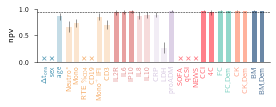

In [39]:
magnification = 1.35
ratio = 2./5.

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'NPV'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_combo_0.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_combo_0.loc[old_labels_sorted_combo, (score, 'Err')].values
dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

mask_npv_high = y>0.9
mask_npv_high = mask_npv_high & (y+yerr>0.95)
x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_low = mask_npv_high==False
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.3
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
mask_npv_none = (y>0.)==False
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.06*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel(name_score)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    

minNPV_train = min_NPV
ax.axhline(y=minNPV_train-0.02, ls='--', color='black', alpha=1, lw=0.5)
ax.set_ylim([0., 1.])
ax.set_yticks([0., 0.5, 1.])
filename = 'minNPV#%sMultiv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000
plt.show()

#### minNPV - specificity

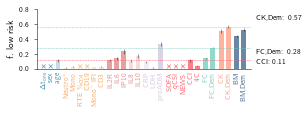

In [41]:
magnification = 1.5
ratio = 2./5.25

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'specificity'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_combo_0.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_combo_0.loc[old_labels_sorted_combo, (score, 'Err')].values

for i, element in enumerate(y):
    if element-yerr[i]<0:
        #pass
        #y[i] = 0.01
        yerr[i] = element/2.

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.3
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.03*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('f. low risk')
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    

y_l = y
y_l[mask_npv_low] = 0
max_score = max(y_l)
idx = np.argmax(y_l)
ax.axhline(y=max_score, ls='--', color=colors[idx], lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx], max_score)
ax.text(1.025, 1.5*max_score, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
idx1 = len_dem+len_fc+len_ck+len_bm
idx2 = idx1 + len_scores
max_score_progscores = max(y_l[idx1:idx2])
idx = np.argmax(y_l[idx1:idx2])+idx1
ax.axhline(y=max_score_progscores, ls='--', color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx], max_score_progscores)
ax.text(1.025, 1.*max_score_progscores, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)
idx1 = len_dem+len_fc+len_ck+len_bm+len_scores
idx2 = idx1 + 2
max_score_FC = max(y_l[idx1:idx2])
idx = np.argmax(y_l[idx1:idx2])+idx1
ax.axhline(y=max_score_FC, ls='--', color=colors[idx], alpha=1, lw=0.5)
my_string = '%s: %.2f' % (x_labels_sorted_combo[idx], max_score_FC)
ax.text(1.025, 1.*max_score_FC, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

ax.set_ylim([0., .8])
ax.set_yticks([0., 0.2, .4, 0.6, 0.8])
filename = 'minNPV#%sMultiv' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000
plt.show()

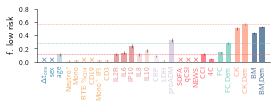

In [42]:
magnification = 1.35
ratio = 2./5.

CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()

score = 'specificity'
if score=='roc_auc_score':
    name_score = 'auc'
elif score=='specificity':
    name_score = score
elif score=='NPV':
    name_score = 'npv'

y = Data_combo_0.loc[old_labels_sorted_combo, (score, 'Mean')].values
yerr =  Data_combo_0.loc[old_labels_sorted_combo, (score, 'Err')].values

for i, element in enumerate(y):
    if element-yerr[i]<0:
        #pass
        #y[i] = 0.01
        yerr[i] = element/2.

dict_errorbars = dict(color='black', alpha=0.8, lw=lines_w, capsize=capsize)

x_pos_l = x_positions_bars[mask_npv_high]
y_l = y[mask_npv_high]
yerr_l = yerr[mask_npv_high]
colors_l = np.array(colors)[mask_npv_high]
alpha = 0.8
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=width, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_low]
y_l = y[mask_npv_low]
yerr_l = yerr[mask_npv_low]
colors_l = np.array(colors)[mask_npv_low]
alpha = 0.3
ax.bar(x_pos_l, y_l, yerr=yerr_l, color=colors_l, alpha=alpha, width=0.6, lw=lines_w, error_kw=dict_errorbars)
#
x_pos_l = x_positions_bars[mask_npv_none]
y_l = 0.03*np.ones_like(x_pos_l)
colors_l = np.array(colors)[mask_npv_none]
alpha = 0.8
ax.scatter(x_pos_l, y_l, marker='x', s=15, color=colors_l, alpha=alpha, lw=0.8)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_combo, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('f. low risk')
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    

y_l = y
y_l[mask_npv_low] = 0
max_score = max(y_l)
idx = np.argmax(y_l)
ax.axhline(y=max_score, ls='--', color=colors[idx], lw=0.5)
idx1 = len_dem+len_fc+len_ck+len_bm
idx2 = idx1 + len_scores
max_score_progscores = max(y_l[idx1:idx2])
idx = np.argmax(y_l[idx1:idx2])+idx1
ax.axhline(y=max_score_progscores, ls='--', color=colors[idx], alpha=1, lw=0.5)
idx1 = len_dem+len_fc+len_ck+len_bm+len_scores
idx2 = idx1 + 2
max_score_FC = max(y_l[idx1:idx2])
idx = np.argmax(y_l[idx1:idx2])+idx1
ax.axhline(y=max_score_FC, ls='--', color=colors[idx], alpha=1, lw=0.5)

#ax.set_yscale('log')
ax.set_ylim([0., .8])
ax.set_yticks([0., 0.2, .4, 0.6, 0.8])
filename = 'minNPV#%sMultiv_noText' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 

#plt.bar(x_positions_bars, perf)
plt.show()

#### Coefficients (FC+Dem)

In [88]:
reg_fixed = True
foldername_multiv = 'MultivModels_DOnsetMin#0#Max#30_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'
name_coef = 'FC+Dem'  #Flowcyt All
filename = 'Parameters_model#LR_name#%s.xlsx' % name_coef
path_import = path_results+foldername_multiv
df_LR_coefbias = pd.read_excel(path_import+filename, engine='openpyxl', header=[0], index_col=0)
n_features_model = len(df_LR_coefbias.columns)

In [89]:
df_LR_coefbias_norm = df_LR_coefbias.values / np.sqrt(np.sum(df_LR_coefbias.values**2, axis=1)).reshape(-1, 1)
df_LR_coefbias_norm = pd.DataFrame(df_LR_coefbias_norm, columns=df_LR_coefbias.columns)

In [90]:
mean_coefbias = []
err_coefbias = []
x_labels_coefbias = []


incluse_bias = True
Data = df_LR_coefbias_norm.copy() # df_LR_coefbias_norm or df_LR_coefbias

for col in Data.columns:
    
    if incluse_bias:
        v = Data[col].values
        ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
        v_mean = np.mean(ci)
        v_err = (ci[1] - ci[0])/2.
        mean_coefbias.append(v_mean)
        err_coefbias.append(v_err)
        x_labels_coefbias.append(col)
    else:
        if col!='bias':
            v = Data[col].values
            ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
            v_mean = np.mean(ci)
            v_err = (ci[1] - ci[0])/2.
            mean_coefbias.append(v_mean)
            err_coefbias.append(v_err)
            x_labels_coefbias.append(col)
            
x_labels_coefbias_plot = CF.change_names(x_labels_coefbias)
mean_coefbias = np.array(mean_coefbias)
err_coefbias = np.array(err_coefbias)

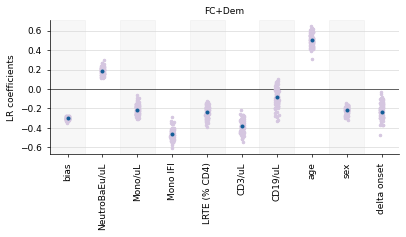

In [91]:
savefig = False

plot_style = 'ScatterPlot' # 'ScatterPlot' or 'Mean-Err'
magnification = 3. / (1 + 0.4 * np.log(37/n_features_model))
ratio = 2.2/5.2 * (1 + 0.3 * np.log(37/n_features_model))
ls = ''
marker = '.'
ms = 5
color = lavander #violet #light_green #green
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=9)
x_range = np.arange(len(x_labels_coefbias))

fig, axs = plt.subplots()

axs.axhline(y=0, color='black', lw=0.7, alpha=0.8)

if plot_style=='ScatterPlot':
    for i, element in enumerate(x_labels_coefbias):
        points = Data[element].values
        mean_val = np.mean(points)
        eps = 1e-1
        noise = np.random.uniform(low=-eps/2., high=eps/2., size=len(points))
        x_i = x_range[i]
        axs.plot(noise+x_i, points, ls=ls, marker=marker, ms=ms, color=color, alpha=1)
        axs.plot(x_i, mean_val, ls=ls, marker=marker, ms=1.2*ms, color=dark_blue, alpha=1)
else:
    axs.errorbar(x=x_range, y=mean_coefbias, yerr=err_coefbias, ls=ls, marker=marker, ms=ms, color=color) #, elinewidth=elinewidth, label=score)

for idx in range(0, len(x_labels_coefbias), 2):
    delta_x = 1
    offset = -0.5
    axs.axvspan(offset+delta_x*idx, offset+delta_x*(idx+1), alpha=0.03, color='black')

axs.set_xticks(x_range)
axs.set_xticklabels(x_labels_coefbias_plot, rotation=90)
axs.set_xlim([min(x_range)-0.5, max(x_range)+0.5])
#axs.set_ylim([-1, 1])
#axs.set_ylim([-0.5, 0.5])
axs.set_ylabel('LR coefficients')
axs.grid(axis='y')
axs.set_title(name_coef)


filename = 'CoefBias_Model#%s' % name_coef
filename = filename + exp_description + exp_multiv_description + '.pdf'    
saving_str = path_figures + filename
if savefig:
    plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

In [92]:
# Labels
old_labels = [col for col in Data.columns]
new_labels = CF.change_names_2(old_labels)
x_labels = np.array(new_labels) # or list(X_data.columns.values)

# Sorting
sorting_score = 'roc_auc_score'
y = np.quantile(Data.values, 0.5, axis=0)
idx_sorted = []
for set_col in [['bias'], immunecells_set+demographics_set]:
    sub_idx = np.array([i for i in range(len(old_labels)) if old_labels[i] in set_col])
    min_sub_idx = min(sub_idx)
    sub_idx_sorted = min_sub_idx + np.argsort(y[sub_idx])
    idx_sorted.extend(sub_idx_sorted)
idx_sorted = np.array(idx_sorted)
x_labels_sorted = np.array(new_labels)[idx_sorted]
old_labels_sorted =  np.array(old_labels)[idx_sorted]


# Colors
colors = ['black'] + [color_IC_multiv]*(len(x_labels_sorted)-1)

Excluding bias...


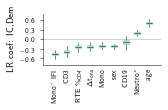

In [94]:
# Exclude bias
print('Excluding bias...')
x_labels_sorted_l = x_labels_sorted[1:]
old_labels_sorted_l = old_labels_sorted[1:]
colors_l = list(np.array(colors)[1:])

x_range = np.arange(len(x_labels_sorted_l), dtype=float)
x_positions_labels = x_range

magnification = 0.83
ratio = 2./3.2

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

alpha = 0.6
widths = 0.5
showfliers = False
showcaps = False
alpha_whisk = 1.

ax.axhline(y=0, color=grey_1, lw=0.5, alpha=1.)

colors_labels = []
for i, element in enumerate(old_labels_sorted_l):
    color = colors_l[i]
    x = Data[element].values
    q2 = np.quantile(x, 0.5)
    stat, pval = st.ttest_1samp(x, 0.0)
    if pval<0.0001:
        if q2<0:
            #color = colors_l[i]
            #x = -x
            pass
        else:
            #color = red_purp
            pass
        colors_labels.append(color)
    else:
        if q2<0:
            #x = -x
            pass
        color = grey_2
        colors_labels.append(grey_1)
        
    bp = ax.boxplot(x=x, positions=[x_positions_labels[i]],
                widths=widths, showfliers=showfliers, showcaps=showcaps, patch_artist=True)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', lw=0.5, alpha=1.)      
    plt.setp(bp['whiskers'], color='black', lw=0.5, alpha=alpha_whisk)
    for box in bp['boxes']:
        box.set(color=color, linewidth=0.7, alpha=1.)
        box.set(facecolor=color, alpha=alpha)
        

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_l, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('LR coef: IC,Dem')
ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.6, -0.3, 0., 0.3, 0.6])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors_labels):
    #xtick.set_color(color)   
    xtick.set_color('black')   
    
filename = 'Coef_Model#ICDem'
filename = filename + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

#### Coefficients (CK+Dem)

In [95]:
name_coef = 'CK+Dem'  #Flowcyt All
filename = 'Parameters_model#LR_name#%s.xlsx' % name_coef
path_import = path_results+foldername_multiv
df_LR_coefbias = pd.read_excel(path_import+filename, engine='openpyxl', header=[0], index_col=0)
n_features_model = len(df_LR_coefbias.columns)

In [96]:
# Normalise coefficients
df_LR_coefbias_norm = df_LR_coefbias.values / np.sqrt(np.sum(df_LR_coefbias.values**2, axis=1)).reshape(-1, 1)
df_LR_coefbias_norm = pd.DataFrame(df_LR_coefbias_norm, columns=df_LR_coefbias.columns)

In [97]:
mean_coefbias = []
err_coefbias = []
x_labels_coefbias = []


incluse_bias = True
Data = df_LR_coefbias_norm.copy() # df_LR_coefbias_norm or df_LR_coefbias

for col in Data.columns:
    
    if incluse_bias:
        v = Data[col].values
        ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
        v_mean = np.mean(ci)
        v_err = (ci[1] - ci[0])/2.
        mean_coefbias.append(v_mean)
        err_coefbias.append(v_err)
        x_labels_coefbias.append(col)
    else:
        if col!='bias':
            v = Data[col].values
            ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
            v_mean = np.mean(ci)
            v_err = (ci[1] - ci[0])/2.
            mean_coefbias.append(v_mean)
            err_coefbias.append(v_err)
            x_labels_coefbias.append(col)
            
x_labels_coefbias_plot = CF.change_names(x_labels_coefbias)
mean_coefbias = np.array(mean_coefbias)
err_coefbias = np.array(err_coefbias)

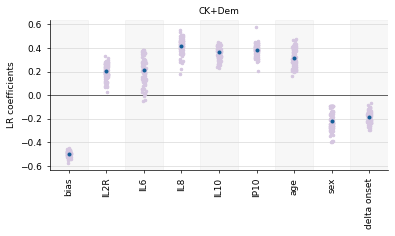

In [98]:
savefig = False

plot_style = 'ScatterPlot' # 'ScatterPlot' or 'Mean-Err'
magnification = 3. / (1 + 0.4 * np.log(37/n_features_model))
ratio = 2.2/5.2 * (1 + 0.3 * np.log(37/n_features_model))
ls = ''
marker = '.'
ms = 5
color = lavander #violet #light_green #green
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=9)
x_range = np.arange(len(x_labels_coefbias))

fig, axs = plt.subplots()

axs.axhline(y=0, color='black', lw=0.7, alpha=0.8)

if plot_style=='ScatterPlot':
    for i, element in enumerate(x_labels_coefbias):
        points = Data[element].values
        mean_val = np.mean(points)
        eps = 1e-1
        noise = np.random.uniform(low=-eps/2., high=eps/2., size=len(points))
        x_i = x_range[i]
        axs.plot(noise+x_i, points, ls=ls, marker=marker, ms=ms, color=color, alpha=1)
        axs.plot(x_i, mean_val, ls=ls, marker=marker, ms=1.2*ms, color=dark_blue, alpha=1)
else:
    axs.errorbar(x=x_range, y=mean_coefbias, yerr=err_coefbias, ls=ls, marker=marker, ms=ms, color=color) #, elinewidth=elinewidth, label=score)

for idx in range(0, len(x_labels_coefbias), 2):
    delta_x = 1
    offset = -0.5
    axs.axvspan(offset+delta_x*idx, offset+delta_x*(idx+1), alpha=0.03, color='black')

axs.set_xticks(x_range)
axs.set_xticklabels(x_labels_coefbias_plot, rotation=90)
axs.set_xlim([min(x_range)-0.5, max(x_range)+0.5])
#axs.set_ylim([-1, 1])
#axs.set_ylim([-0.5, 0.5])
axs.set_ylabel('LR coefficients')
axs.grid(axis='y')
axs.set_title(name_coef)


filename = 'CoefBias_Model#%s' % name_coef
filename = filename + exp_description + exp_multiv_description + '.pdf'    
saving_str = path_figures + filename
if savefig:
    plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

In [99]:
# Labels
old_labels = [col for col in Data.columns]
new_labels = CF.change_names_2(old_labels)
x_labels = np.array(new_labels) # or list(X_data.columns.values)

# Sorting
sorting_score = 'roc_auc_score'
y = np.quantile(Data.values, 0.5, axis=0)
idx_sorted = []
for set_col in [['bias'], cytokines_set+demographics_set]:
    sub_idx = np.array([i for i in range(len(old_labels)) if old_labels[i] in set_col])
    min_sub_idx = min(sub_idx)
    sub_idx_sorted = min_sub_idx + np.argsort(y[sub_idx])
    idx_sorted.extend(sub_idx_sorted)
idx_sorted = np.array(idx_sorted)
x_labels_sorted = np.array(new_labels)[idx_sorted]
old_labels_sorted =  np.array(old_labels)[idx_sorted]


# Colors
colors = ['black'] + [color_CK_multiv]*(len(x_labels_sorted)-1)

Excluding bias...


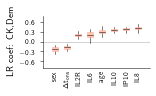

In [101]:
# Exclude bias
print('Excluding bias...')
x_labels_sorted_l = x_labels_sorted[1:]
old_labels_sorted_l = old_labels_sorted[1:]
colors_l = list(np.array(colors)[1:])

x_range = np.arange(len(x_labels_sorted_l), dtype=float)
x_positions_labels = x_range

magnification = 0.775
ratio = 2./3.5

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

alpha = 0.6
widths = 0.5
showfliers = False
showcaps = False
alpha_whisk = 1.

ax.axhline(y=0, color=grey_1, lw=0.5, alpha=1.)

colors_labels = []
for i, element in enumerate(old_labels_sorted_l):
    color = colors_l[i]
    x = Data[element].values
    q2 = np.quantile(x, 0.5)
    stat, pval = st.ttest_1samp(x, 0.0)
    if pval<0.0001:
        if q2<0:
            #color = colors_l[i]
            #x = -x
            pass
        else:
            #color = red_purp
            pass
        colors_labels.append(color)
    else:
        if q2<0:
            #x = -x
            pass
        #color = grey_2
        #colors_labels.append(grey_1)
        colors_labels.append(color)
        
    bp = ax.boxplot(x=x, positions=[x_positions_labels[i]],
                widths=widths, showfliers=showfliers, showcaps=showcaps, patch_artist=True)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', lw=0.5, alpha=1.)      
    plt.setp(bp['whiskers'], color='black', lw=0.5, alpha=alpha_whisk)
    for box in bp['boxes']:
        box.set(color=color, linewidth=0.7, alpha=1.)
        box.set(facecolor=color, alpha=alpha)
        

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_l, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('LR coef: CK,Dem')
ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.6, -0.3, 0., 0.3, 0.6])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors_labels):
    #xtick.set_color(color) 
    xtick.set_color('black') 
    
filename = 'Coef_Model#CKDem'
filename = filename + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

#### Coefficients (BM+Dem)

In [102]:
name_coef = 'BM+Dem'  #Flowcyt All
filename = 'Parameters_model#LR_name#%s.xlsx' % name_coef
path_import = path_results+foldername_multiv
df_LR_coefbias = pd.read_excel(path_import+filename, engine='openpyxl', header=[0], index_col=0)
n_features_model = len(df_LR_coefbias.columns)

In [103]:
# Normalise coefficients
df_LR_coefbias_norm = df_LR_coefbias.values / np.sqrt(np.sum(df_LR_coefbias.values**2, axis=1)).reshape(-1, 1)
df_LR_coefbias_norm = pd.DataFrame(df_LR_coefbias_norm, columns=df_LR_coefbias.columns)

In [104]:
mean_coefbias = []
err_coefbias = []
x_labels_coefbias = []


incluse_bias = True
Data = df_LR_coefbias_norm.copy() # df_LR_coefbias_norm or df_LR_coefbias

for col in Data.columns:
    
    if incluse_bias:
        v = Data[col].values
        ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
        v_mean = np.mean(ci)
        v_err = (ci[1] - ci[0])/2.
        mean_coefbias.append(v_mean)
        err_coefbias.append(v_err)
        x_labels_coefbias.append(col)
    else:
        if col!='bias':
            v = Data[col].values
            ci = st.t.interval(alpha=0.95, df=len(v)-1, loc=np.mean(v), scale=st.sem(v))
            v_mean = np.mean(ci)
            v_err = (ci[1] - ci[0])/2.
            mean_coefbias.append(v_mean)
            err_coefbias.append(v_err)
            x_labels_coefbias.append(col)
            
x_labels_coefbias_plot = CF.change_names(x_labels_coefbias)
mean_coefbias = np.array(mean_coefbias)
err_coefbias = np.array(err_coefbias)

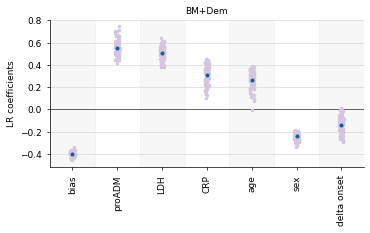

In [105]:
savefig = False

plot_style = 'ScatterPlot' # 'ScatterPlot' or 'Mean-Err'
magnification = 3. / (1 + 0.4 * np.log(37/n_features_model))
ratio = 2.2/5.2 * (1 + 0.3 * np.log(37/n_features_model))
ls = ''
marker = '.'
ms = 5
color = lavander #violet #light_green #green
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=9)
x_range = np.arange(len(x_labels_coefbias))

fig, axs = plt.subplots()

axs.axhline(y=0, color='black', lw=0.7, alpha=0.8)

if plot_style=='ScatterPlot':
    for i, element in enumerate(x_labels_coefbias):
        points = Data[element].values
        mean_val = np.mean(points)
        eps = 1e-1
        noise = np.random.uniform(low=-eps/2., high=eps/2., size=len(points))
        x_i = x_range[i]
        axs.plot(noise+x_i, points, ls=ls, marker=marker, ms=ms, color=color, alpha=1)
        axs.plot(x_i, mean_val, ls=ls, marker=marker, ms=1.2*ms, color=dark_blue, alpha=1)
else:
    axs.errorbar(x=x_range, y=mean_coefbias, yerr=err_coefbias, ls=ls, marker=marker, ms=ms, color=color) #, elinewidth=elinewidth, label=score)

for idx in range(0, len(x_labels_coefbias), 2):
    delta_x = 1
    offset = -0.5
    axs.axvspan(offset+delta_x*idx, offset+delta_x*(idx+1), alpha=0.03, color='black')

axs.set_xticks(x_range)
axs.set_xticklabels(x_labels_coefbias_plot, rotation=90)
axs.set_xlim([min(x_range)-0.5, max(x_range)+0.5])
#axs.set_ylim([-1, 1])
#axs.set_ylim([-0.5, 0.5])
axs.set_ylabel('LR coefficients')
axs.grid(axis='y')
axs.set_title(name_coef)


filename = 'CoefBias_Model#%s' % name_coef
filename = filename + exp_description + exp_multiv_description + '.pdf'    
saving_str = path_figures + filename
if savefig:
    plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

In [106]:
# Labels
old_labels = [col for col in Data.columns]
new_labels = CF.change_names_2(old_labels)
x_labels = np.array(new_labels) # or list(X_data.columns.values)

# Sorting
sorting_score = 'roc_auc_score'
y = np.quantile(Data.values, 0.5, axis=0)
idx_sorted = []
for set_col in [['bias'], biomarkers_set+demographics_set]:
    sub_idx = np.array([i for i in range(len(old_labels)) if old_labels[i] in set_col])
    min_sub_idx = min(sub_idx)
    sub_idx_sorted = min_sub_idx + np.argsort(y[sub_idx])
    idx_sorted.extend(sub_idx_sorted)
idx_sorted = np.array(idx_sorted)
x_labels_sorted = np.array(new_labels)[idx_sorted]
old_labels_sorted =  np.array(old_labels)[idx_sorted]


# Colors
colors = ['black'] + [color_BM_multiv]*(len(x_labels_sorted)-1)

Excluding bias...


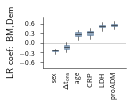

In [108]:
# Exclude bias
print('Excluding bias...')
x_labels_sorted_l = x_labels_sorted[1:]
old_labels_sorted_l = old_labels_sorted[1:]
colors_l = list(np.array(colors)[1:])

x_range = np.arange(len(x_labels_sorted_l), dtype=float)
x_positions_labels = x_range

magnification = 0.66
ratio = 2./2.7

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

alpha = 0.6
widths = 0.5
showfliers = False
showcaps = False
alpha_whisk = 1.

ax.axhline(y=0, color=grey_1, lw=0.5, alpha=1.)

colors_labels = []
for i, element in enumerate(old_labels_sorted_l):
    color = colors_l[i]
    x = Data[element].values
    q2 = np.quantile(x, 0.5)
    stat, pval = st.ttest_1samp(x, 0.0)
    if pval<0.0001:
        if q2<0:
            #color = colors_l[i]
            #x = -x
            pass
        else:
            #color = red_purp
            pass
        colors_labels.append(color)
    else:
        if q2<0:
            #x = -x
            pass
        #color = grey_2
        #colors_labels.append(grey_1)
        colors_labels.append(color)
        
    bp = ax.boxplot(x=x, positions=[x_positions_labels[i]],
                widths=widths, showfliers=showfliers, showcaps=showcaps, patch_artist=True)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', lw=0.5, alpha=1.)      
    plt.setp(bp['whiskers'], color='black', lw=0.5, alpha=alpha_whisk)
    for box in bp['boxes']:
        box.set(color=color, linewidth=0.7, alpha=1.)
        box.set(facecolor=color, alpha=alpha)
        

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(x_labels_sorted_l, rotation=90)
ax.set_xlim([min(x_positions_labels)-1, max(x_positions_labels)+1])
ax.set_ylabel('LR coef: BM,Dem')
ax.set_ylim([-0.8, 0.8])
ax.set_yticks([-0.6, -0.3, 0., 0.3, 0.6])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors_labels):
    #xtick.set_color(color)   
    xtick.set_color('black')   
    
filename = 'Coef_Model#BMDem'
filename = filename + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str, bbox_inches='tight') # dpi=1000, 
plt.show()

## Age stratification

### Import files

In [73]:
foldername_multiv_1 = 'MultivModels_DOnsetMin#0#Max#30_AgeMin#30#Max#70_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'
foldername_multiv_2 = 'MultivModels_DOnsetMin#0#Max#30_AgeMin#70#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'

In [74]:
path_import = path_results+foldername_multiv_1
filename = 'performances_test.xlsx'
df_performances_1 = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)
#
path_import = path_results+foldername_multiv_2
filename = 'performances_test.xlsx'
df_performances_2 = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)

In [75]:
# Clean nans
df_performances_1 = df_performances_1.where(df_performances_1.notnull().values, 0)
df_performances_2 = df_performances_2.where(df_performances_2.notnull().values, 0)

### Scores

In [76]:
Data_1 = df_performances_1
Data_2 = df_performances_2
scores = [element[0] for element in Data_1.columns]
scores = list(dict.fromkeys(scores))

index = [col.replace('LR: ', '') for col in Data_1.index]
Data_1.index = index
index = [col.replace('LR: ', '') for col in Data_2.index]
Data_2.index = index

### Plot

#### AUC

best: 0.86


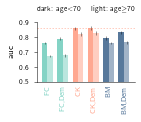

In [77]:
x_range = np.arange(len(multiv_models), dtype=float)
x_positions_labels = x_range
x_positions_bars = x_positions_labels

colors = [color_IC_multiv]*2 + [color_CK_multiv]*2 + [color_BM_multiv]*2

magnification = .68
ratio = 2./2.225

fig_width = 2.9 * magnification # width in inches
fig_height = fig_width*ratio  # height in inches
fig_width = 3.0 * magnification # width in inches

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(height=fig_height, width=fig_width, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

score = 'roc_auc_score'

y_1 = Data_1.loc[multiv_models, (score, 'Mean')].values
y_min_1 = min(y_1)
y_max_1 = max(y_1)
yerr_1 =  Data_1.loc[multiv_models, (score, 'Err')].values
#
y_2 = Data_2.loc[multiv_models, (score, 'Mean')].values
y_min_1 = min(y_2)
y_max_2 = max(y_2)
yerr_2 =  Data_2.loc[multiv_models, (score, 'Err')].values

dict_errorbars = dict(color='black', alpha=.8, lw=lines_w, capsize=capsize) #alpha=0.8
ax.bar(x_positions_bars-0.18, y_1, yerr=yerr_1, color=colors, alpha=0.9, width=0.35, lw=lines_w, error_kw=dict_errorbars)
ax.bar(x_positions_bars+0.18, y_2, yerr=yerr_2, color=colors, alpha=0.5, width=0.35, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(multiv_models_names, rotation=90)
ax.set_xlim([min(x_positions_labels)-0.7, max(x_positions_labels)+0.7])
ax.set_ylabel('auc')
ax.set_ylim([0.5, .9])
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    
max_score = max(y_1)
idx = np.argmax(y_1)
ax.axhline(y=max_score, ls='--', dashes=(3., 3.), color=colors[idx], alpha=1., lw=0.5)
my_string = 'best: %.2f' % (max_score)
print(my_string)

my_string = 'dark: age$<$70'
ax.text(-0., 1.2, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'light: age$\ge$70'
ax.text(1., 1.2, my_string,
           horizontalalignment='right',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sMultiv#AgeStratification' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 

#plt.bar(x_positions_bars, perf)
plt.show()

## Donset stratification

### Import files

In [83]:
foldername_multiv_1 = 'MultivModels_DOnsetMin#0#Max#10_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'
foldername_multiv_2 = 'MultivModels_DOnsetMin#11#Max#30_AgeMin#30#Max#100_Target#IOT+death_Std#PowerTransformer_DatasetMaskedByCCI_RegFixed#False_NansRowGroupwise#50_PCAPercVarTh#5/'


In [84]:
path_import = path_results+foldername_multiv_1
filename = 'performances_test.xlsx'
df_performances_1 = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)
#
path_import = path_results+foldername_multiv_2
filename = 'performances_test.xlsx'
df_performances_2 = pd.read_excel(path_import+filename, engine='openpyxl', header=[0, 1], index_col=0)

In [85]:
# Clean nans
df_performances_1 = df_performances_1.where(df_performances_1.notnull().values, 0)
df_performances_2 = df_performances_2.where(df_performances_2.notnull().values, 0)

### Scores

In [86]:
Data_1 = df_performances_1
Data_2 = df_performances_2
scores = [element[0] for element in Data_1.columns]
scores = list(dict.fromkeys(scores))

index = [col.replace('LR: ', '') for col in Data_1.index]
Data_1.index = index
index = [col.replace('LR: ', '') for col in Data_2.index]
Data_2.index = index

### Plot

#### AUC

best: 0.89


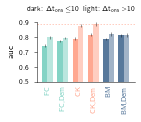

In [87]:
x_range = np.arange(len(multiv_models), dtype=float)
x_positions_labels = x_range
x_positions_bars = x_positions_labels

colors = [color_IC_multiv]*2 + [color_CK_multiv]*2 + [color_BM_multiv]*2

magnification = .68
ratio = 2./2.225

fig_width = 2.9 * magnification # width in inches
fig_height = fig_width*ratio  # height in inches
fig_width = 3.0 * magnification # width in inches

#CF.SetPlotParams(magnification=magnification, ratio=ratio, fontsize=10, ylabelsize=8, xlabelsize=8, tex=True)
CF.SetPlotParams(height=fig_height, width=fig_width, fontsize=fontsize, ylabelsize=ylabelsize,
                        xlabelsize=xlabelsize, tex=tex, axes_lines_w=axes_lines_w, lines_w=lines_w, legendmarker=True)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')


fig, ax = plt.subplots()
#fig.subplots_adjust(hspace=.5)

score = 'roc_auc_score'

y_1 = Data_1.loc[multiv_models, (score, 'Mean')].values
y_min_1 = min(y_1)
y_max_1 = max(y_1)
yerr_1 =  Data_1.loc[multiv_models, (score, 'Err')].values
#
y_2 = Data_2.loc[multiv_models, (score, 'Mean')].values
y_min_1 = min(y_2)
y_max_2 = max(y_2)
yerr_2 =  Data_2.loc[multiv_models, (score, 'Err')].values

dict_errorbars = dict(color='black', alpha=.8, lw=lines_w, capsize=capsize) #alpha=0.8
ax.bar(x_positions_bars-0.18, y_1, yerr=yerr_1, color=colors, alpha=0.9, width=0.35, lw=lines_w, error_kw=dict_errorbars)
ax.bar(x_positions_bars+0.18, y_2, yerr=yerr_2, color=colors, alpha=0.5, width=0.35, lw=lines_w, error_kw=dict_errorbars)

ax.set_xticks(x_positions_labels)
ax.set_xticklabels(multiv_models_names, rotation=90)
ax.set_xlim([min(x_positions_labels)-0.7, max(x_positions_labels)+0.7])
ax.set_ylabel('auc')
ax.set_ylim([0.5, .9])
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
ax.xaxis.set_ticks_position('none') 
ax.tick_params(axis='x', which='major', pad=2)


for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)    
    
max_score = max(y_2)
idx = np.argmax(y_2)
ax.axhline(y=max_score, ls='--', dashes=(3., 3.), color=colors[idx], alpha=1., lw=0.5)
my_string = 'best: %.2f' % (max_score)
print(my_string)

my_string = 'dark: $\mathrm{\Delta t_{ons}}\le$10'
ax.text(-.1, 1.2, my_string,
           horizontalalignment='left',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

my_string = 'light: $\mathrm{\Delta t_{ons}}>$10'
ax.text(1.0, 1.2, my_string,
           horizontalalignment='right',
           verticalalignment='center',
           rotation='horizontal',
           transform=ax.transAxes,
           fontsize=ylabelsize)

if score=='roc_auc_score':
    name_score = 'auc'

filename = '%sMultiv#DonsetStratification' % (name_score) + '.pdf'    
saving_str = path_figures + filename
plt.savefig(saving_str,bbox_inches='tight') # dpi=1000, 

#plt.bar(x_positions_bars, perf)
plt.show()